<a href="https://colab.research.google.com/github/pshvaa/fraud-transaction-detect/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install kaggle

In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabirapashayeva","key":"5f608fadf25125954bc327bf6fe24ec6"}'}

In [6]:
! chmod 600 /content/kaggle/kaggle.json

chmod: cannot access '/content/kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 79% 52.0M/66.0M [00:00<00:00, 131MB/s]
100% 66.0M/66.0M [00:00<00:00, 137MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('creditcardfraud.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
df = pd.read_csv(r'/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [14]:
df.isnull().values.any()

False

In [15]:
counts = df['Class'].value_counts().tolist()
percentages = []

for num in counts:
    percentage = round(num / sum(counts) * 100, 2)
    percentages.append(percentage)

percentages

[99.83, 0.17]

In [16]:
# colors = ["#0101DF", "#DF0101"]

# sns.countplot(df['Class'], hue=colors)
# plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

<Axes: ylabel='Density'>

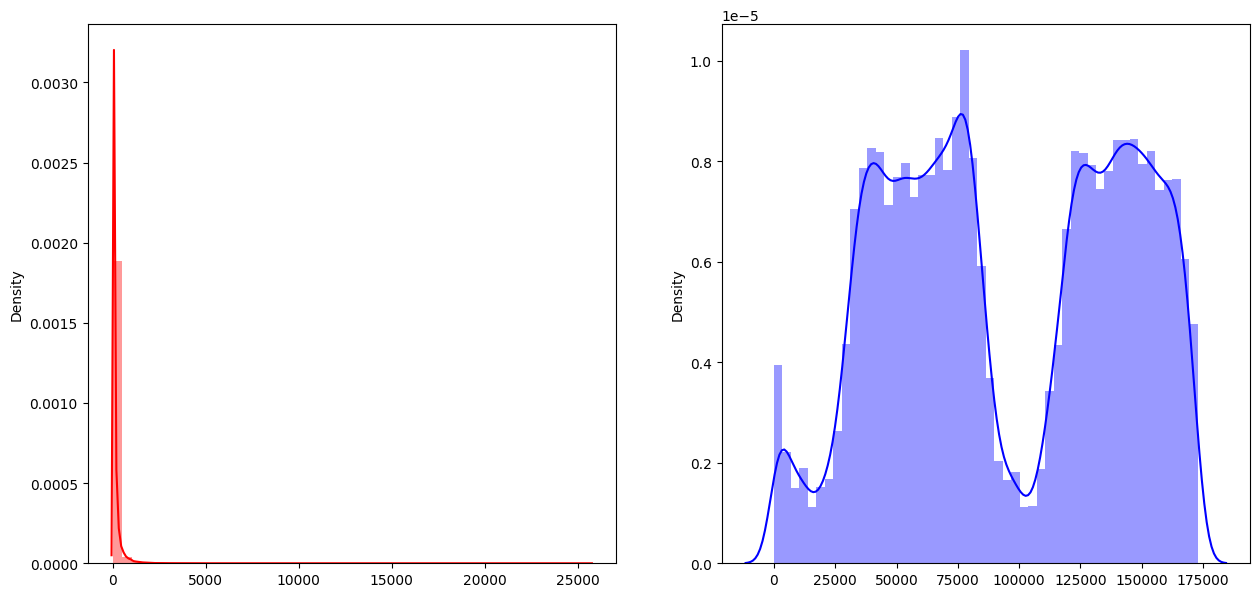

In [17]:
fig, ax= plt.subplots(1,2, figsize=(15,7))

amount= df['Amount'].values
time= df['Time'].values

sns.distplot(amount,ax=ax[0], color='r')
sns.distplot(time,ax=ax[1],color='b')

# *Scaling and Distributing*

In [18]:
from sklearn.preprocessing import RobustScaler, StandardScaler
rob_scaler = RobustScaler()
df["Amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

In [19]:
rob_scal = RobustScaler()
df["Time"] = rob_scal.fit_transform(df["Time"].values.reshape(-1, 1))

In [20]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,1.034904,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,0
284798,1.034904,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0.028645,0
284799,1.034916,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0.810312,0
284800,1.034928,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,0
284801,1.034939,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


*Splitting the data*

In [21]:
X_org = df.drop("Class", axis = 1)
y_org = df.loc[:, "Class"]

In [22]:
from sklearn.model_selection import train_test_split
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org, y_org, test_size = 0.2, random_state = 42)

In [23]:
X_org_train.shape, X_org_test.shape, y_org_train.shape, y_org_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

# Random Sampling
We will implement **"Random Under Sampling"** which basically consists of removing data in order **to have a more balanced dataset and thus avoiding our models to overfitting.**

*Note:*  The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [24]:
df = df.sample(frac = 1)
# amount of the fraud classes are 492 rows

fraud_df = df[df["Class"] == 1]
non_fraud_df = df[df["Class"] == 0][:492] #Taking the top 492 row at the top

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac = 1, random_state = 42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148492,0.061831,2.054353,-0.142288,-1.251335,0.192164,0.108001,-0.627358,0.040751,-0.132376,0.380680,0.256100,0.457314,0.737952,-0.373975,0.530129,-0.577853,0.250410,-0.686955,-0.165573,0.618301,-0.227717,-0.274433,-0.709565,0.274965,-0.504670,-0.279403,0.209554,-0.077858,-0.076037,-0.294977,0
102443,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.293440,1
73319,-0.347854,-0.711434,1.216109,2.063610,1.382705,0.539143,0.146861,0.917074,0.052001,-0.985871,-0.280234,-1.428507,0.195022,0.757942,-0.469188,-1.404756,0.580762,-0.760607,-0.544445,-1.057063,-0.093277,-0.227046,-0.615208,-0.192568,-0.136094,0.203483,-0.310754,0.062028,0.098971,-0.042479,0
167305,0.398395,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1.172221,1
57248,-0.433111,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,0.141179,-0.460348,-0.367868,-1.168339,0.152108,0.882232,0.601805,-0.304092,-2.191764,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,-0.201495,1


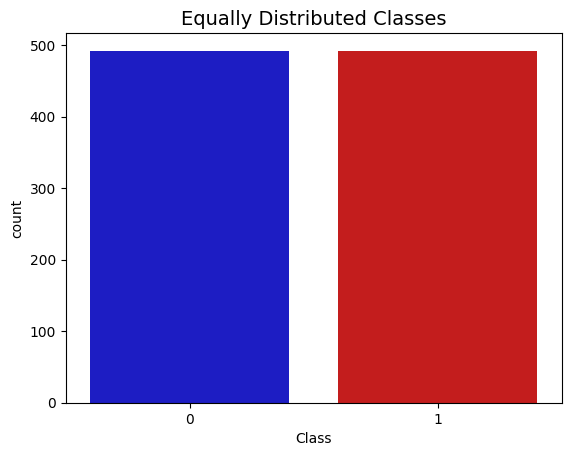

In [25]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(new_df, x = 'Class', palette = colors)
plt.title('Equally Distributed Classes', fontsize = 14);

<Axes: >

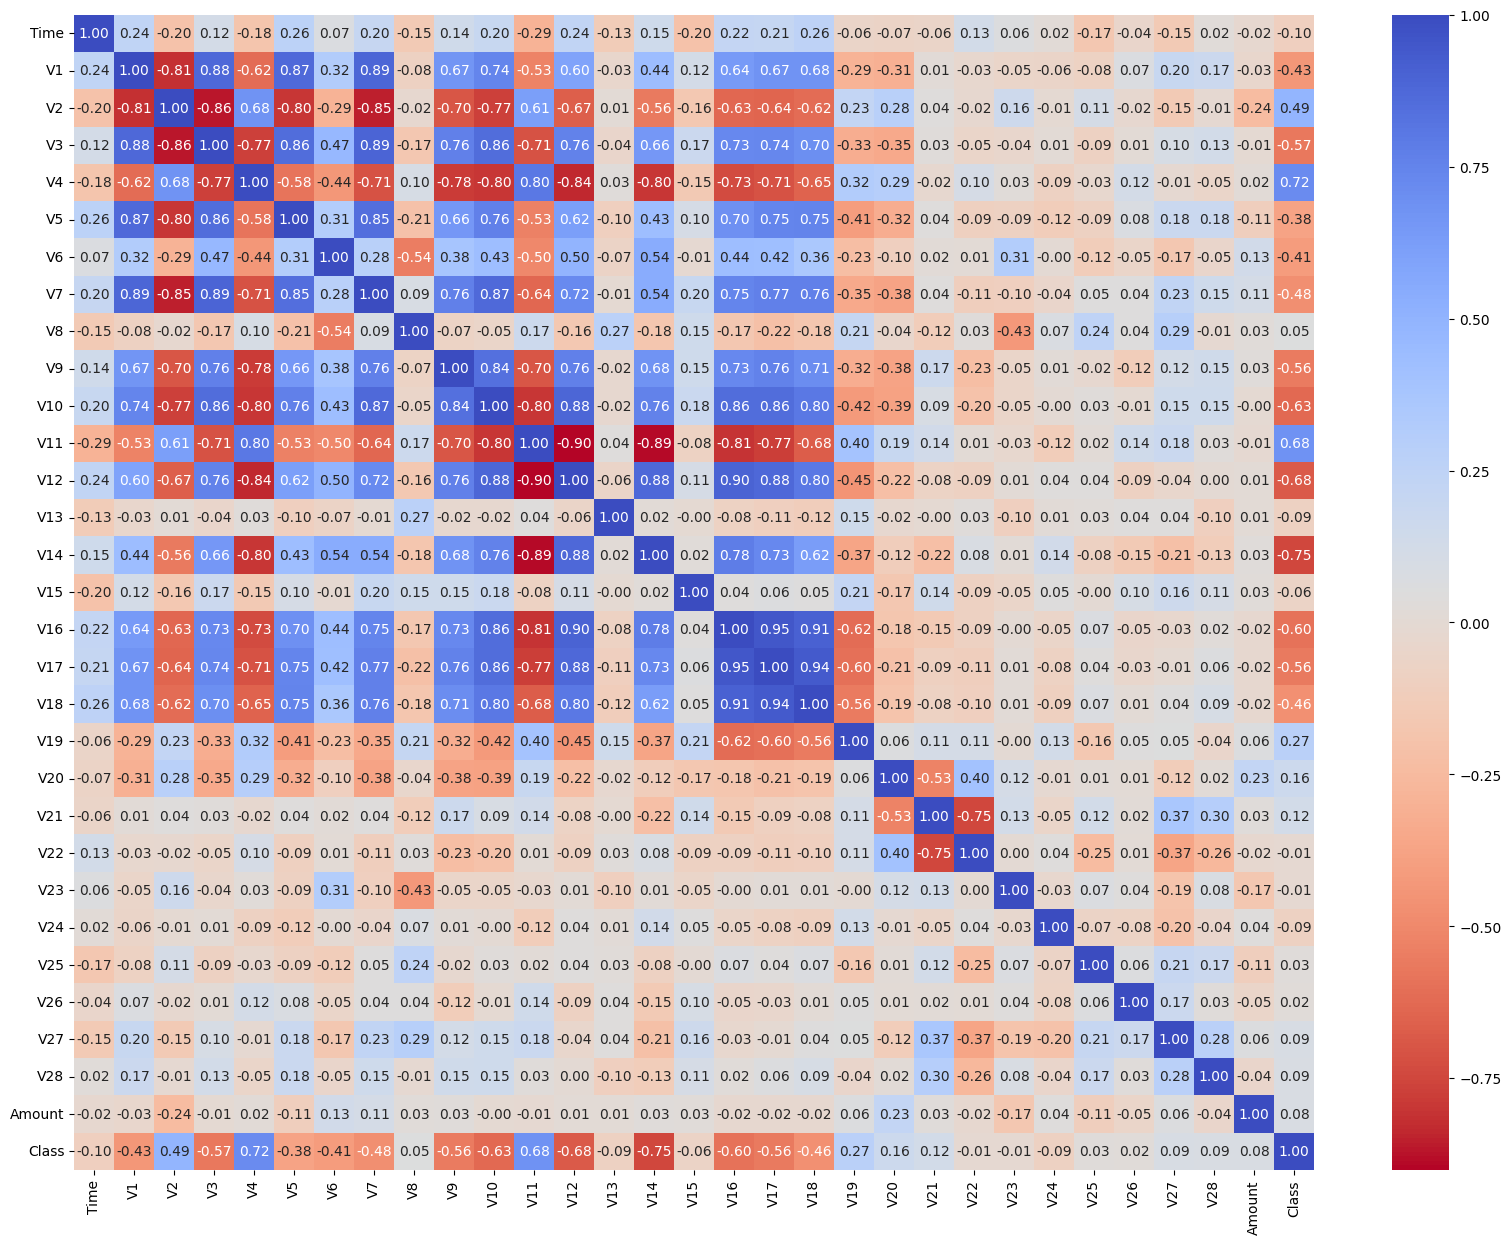

In [26]:
plt.figure(figsize = (20, 15))
sns.heatmap(new_df.corr(), annot = True, cmap = 'coolwarm_r', fmt='.2f')

1. **Negative Correlations**: V17,V16, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
2. **Positive Correlations**: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
3. **BoxPlots**: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.



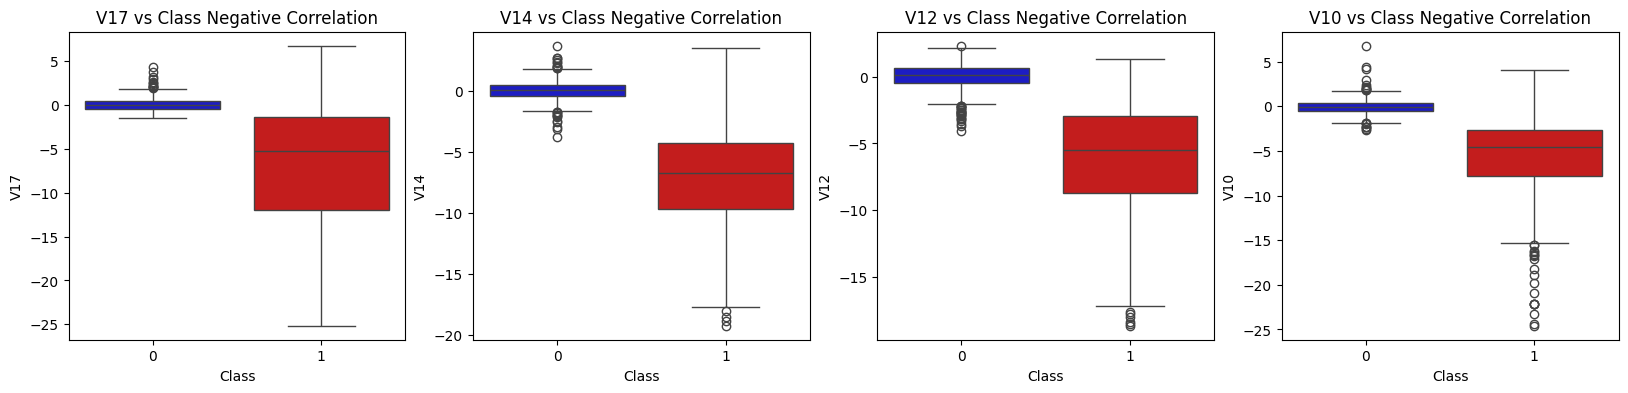

In [27]:
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

fig.show()


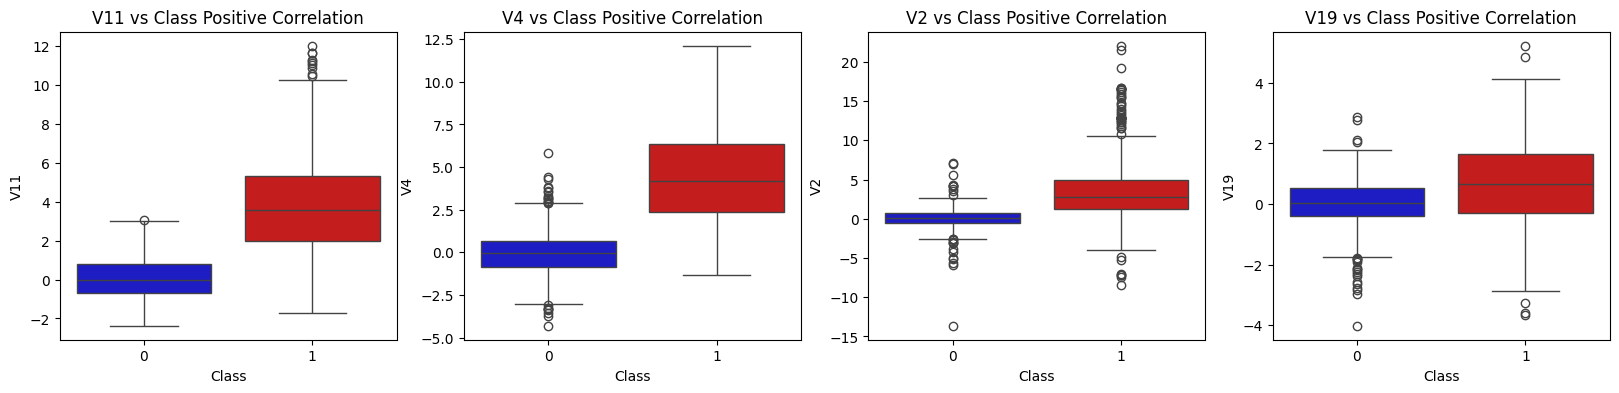

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

1. **visualize Distributions:** We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
2. **Determining the threshold:** After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
3. **Conditional Dropping**: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
4. **Boxplot Representation**: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

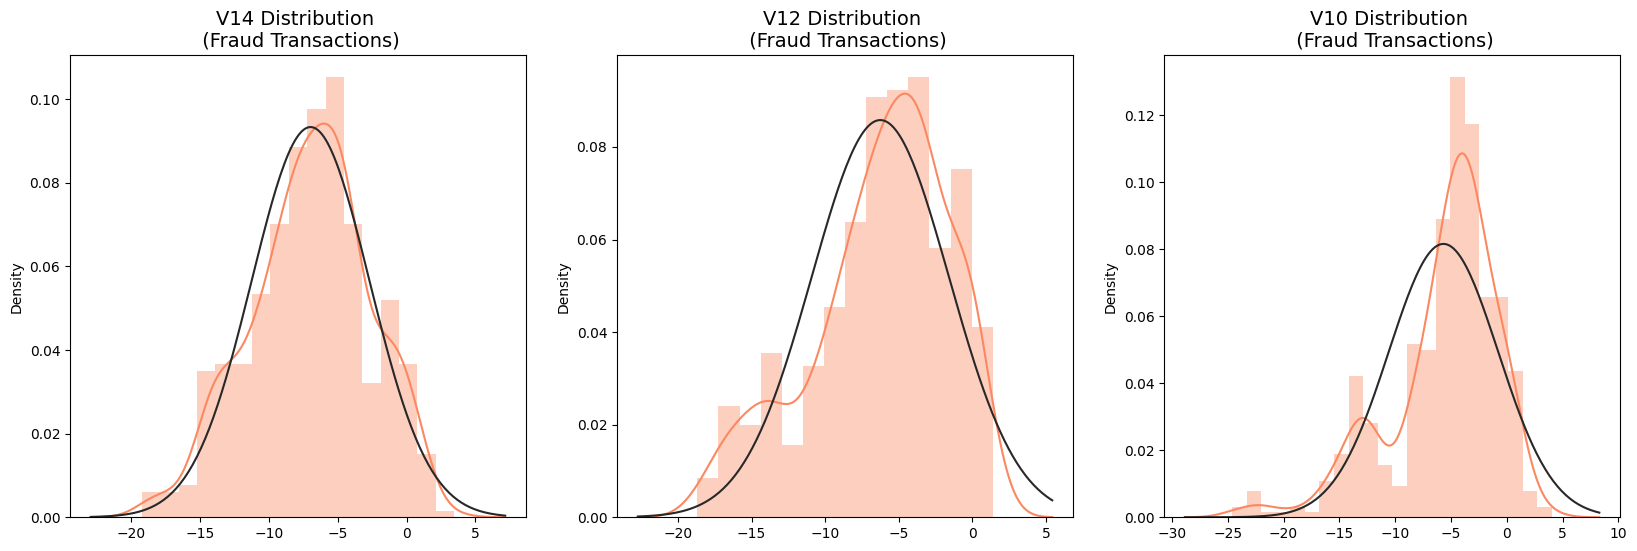

In [29]:
from scipy.stats import norm

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

v14_fraud_dist = new_df["V14"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist, ax = ax1, fit = norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df["V12"].loc[new_df["Class"] == 1].values
sns.distplot(v12_fraud_dist, ax = ax2, fit = norm, color='#FB8861')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df["V10"].loc[new_df["Class"] == 1].values
sns.distplot(v10_fraud_dist, ax = ax3, fit = norm, color='#FB8861')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [52]:
df2 = new_df.copy()
# treat = ['V14', 'V12', 'V10']

# for col in treat:


def remove_outliers_iqr(data, cols, threshold=1.5):
    for col in cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data = data.drop(data[(data[col] > upper_bound) | (data[col] < lower_bound)].index)
    return data

In [36]:
new_df.shape

(984, 31)

In [56]:
columns_to_treat = ['V14', 'V12', 'V10']

In [53]:
df2 = remove_outliers_iqr(df2, ['V14', 'V12', 'V10'])
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148492,0.061831,2.054353,-0.142288,-1.251335,0.192164,0.108001,-0.627358,0.040751,-0.132376,0.380680,0.256100,0.457314,0.737952,-0.373975,0.530129,-0.577853,0.250410,-0.686955,-0.165573,0.618301,-0.227717,-0.274433,-0.709565,0.274965,-0.504670,-0.279403,0.209554,-0.077858,-0.076037,-0.294977,0
102443,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.293440,1
73319,-0.347854,-0.711434,1.216109,2.063610,1.382705,0.539143,0.146861,0.917074,0.052001,-0.985871,-0.280234,-1.428507,0.195022,0.757942,-0.469188,-1.404756,0.580762,-0.760607,-0.544445,-1.057063,-0.093277,-0.227046,-0.615208,-0.192568,-0.136094,0.203483,-0.310754,0.062028,0.098971,-0.042479,0
167305,0.398395,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1.172221,1
57248,-0.433111,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,0.141179,-0.460348,-0.367868,-1.168339,0.152108,0.882232,0.601805,-0.304092,-2.191764,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,-0.201495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123301,-0.091824,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,-0.168893,-2.544410,0.707000,-0.835696,-1.022117,-4.993992,-0.455707,1.315365,3.639200,1.623426,-1.539339,-0.187572,-0.332983,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,-0.293440,1
266413,0.912006,-0.375570,0.729106,0.405725,-0.893433,1.275089,-0.520219,1.104731,-0.213202,-0.443636,-0.795556,-1.747832,0.154609,1.000310,-0.038821,-0.399311,0.127603,-0.795082,-0.465999,0.420257,0.028133,-0.248317,-0.704365,-0.169409,-0.979297,-0.147944,0.228955,0.058168,0.132497,-0.125900,0
154286,0.192190,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,1.368585,-1.471697,-0.724759,3.442422,-0.957403,-1.626129,1.418215,-1.417917,-1.651766,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,-0.294557,1
184753,0.489679,-0.012776,0.663544,0.140441,-0.762924,0.546477,-0.562888,0.808064,0.058406,-0.091786,-0.216516,0.312179,0.063819,-1.286559,0.548846,-0.891941,0.200667,-0.650025,-0.075985,0.264659,-0.083861,-0.233297,-0.601474,0.058618,-0.438019,-0.529735,0.150372,0.234667,0.081581,-0.171313,0


In [54]:
from collections import Counter
Counter(df2["Class"])

Counter({0: 491, 1: 406})

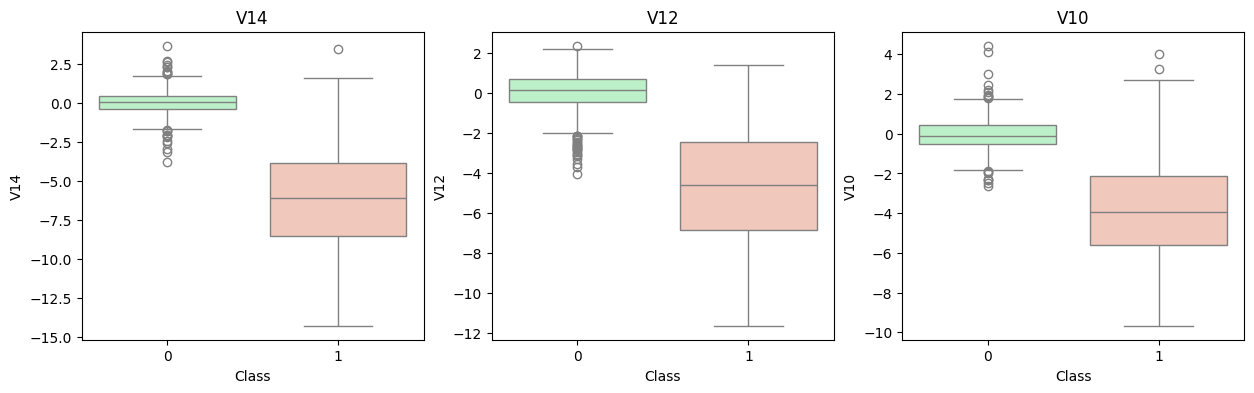

In [59]:
fig, ax = plt.subplots(ncols = len(columns_to_treat), figsize = (15, 4))
colors = ['#B3F9C5', '#f9c5b3']

for i, j in enumerate(columns_to_treat):
  sns.boxplot(ax = ax[i], data = df2, x = "Class", y = j, palette = colors)
  ax[i].set_title(j)

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = df2.drop("Class", axis = 1).values
y = df2.loc[:, 'Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting the models and calculating test and training score

In [63]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier()
}

In [64]:
for key, values in classifiers.items():
  values.fit(X_train, y_train)
  training_score = cross_val_score(values, X_train, y_train, cv = 5)
  print('Training accuracy score of {} is {}: '.format(key, round(training_score.mean() * 100, 2)))
  train_pred = cross_val_predict(values, X_train, y_train)
  print('Roc_auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train, train_pred) * 100, 2)))
  test_score = cross_val_score(values, X_test, y_test, cv = 5)
  print('Test accuracy score of {} is {}: '.format(key, round(test_score.mean() * 100, 2)))
  test_pred = cross_val_predict(values, X_test, y_test)
  print('Roc_auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test, test_pred) * 100, 2)))
  print('---'*30)

Training accuracy score of Logistic Regression is 94.56: 
Roc_auc training score for Logistic Regression is 94.11: 
Test accuracy score of Logistic Regression is 88.89: 
Roc_auc test score for Logistic Regression is 88.88: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 93.17: 
Roc_auc training score for KNN is 92.6: 
Test accuracy score of KNN is 87.22: 
Roc_auc test score for KNN is 87.1: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 94.14: 
Roc_auc training score for SVC is 93.51: 
Test accuracy score of SVC is 88.33: 
Roc_auc test score for SVC is 88.25: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 91.07: 
Roc_auc training score for DecisionTree is 90.61: 
Test accuracy score of DecisionTree is 83.89: 
Roc_auc test score for DecisionTree 

In [66]:
for key, values in classifiers.items():
  values.fit(X_train, y_train)
  test_score = cross_val_score(values, X_org_test, y_org_test, cv = 5)
  print('Test accuracy score of {} is {}: '.format(key, round(test_score.mean() * 100, 2)))
  test_pred = cross_val_predict(values, X_org_test, y_org_test, cv = 5)
  print('Roc_auc_score for {} is {}'.format(key, round(roc_auc_score(y_org_test, test_pred) * 100, 2)))
  print('---'*30)

Test accuracy score of Logistic Regression is 99.91: 
Roc_auc_score for Logistic Regression is 79.58
------------------------------------------------------------------------------------------
Test accuracy score of KNN is 99.91: 
Roc_auc_score for KNN is 82.13
------------------------------------------------------------------------------------------
Test accuracy score of SVC is 99.9: 
Roc_auc_score for SVC is 73.46
------------------------------------------------------------------------------------------
Test accuracy score of DecisionTree is 99.9: 
Roc_auc_score for DecisionTree is 81.61
------------------------------------------------------------------------------------------
Test accuracy score of RandomForest is 99.94: 
Roc_auc_score for RandomForest is 86.22
------------------------------------------------------------------------------------------


# Hyper Parameter Tuning using GridSearchCv

In [67]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

knears_params = {
    "n_neighbors": list(range(2, 5, 1)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

svc_params = {
    'C': [0.5, 0.7, 0.9, 1],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 4, 1)),
    "min_samples_leaf": list(range(5, 7, 1))
}

rf_params = {
    "n_estimators": [10, 50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 10, 2)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


In [70]:
def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(X_train, y_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))



grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=1)


In [75]:
log_reg= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   n_jobs=None,
                   random_state=None, tol=0.0001, verbose=0,
                   warm_start=False)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1)

In [77]:
log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,method="decision_function")

In [79]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold= roc_curve(y_test,log_reg_pred)

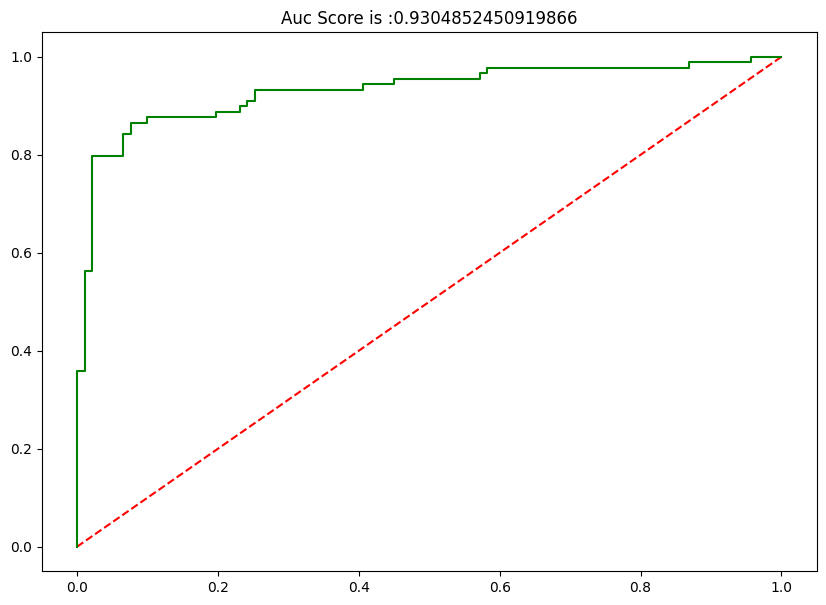

In [83]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'g')
plt.title('Auc Score is :'+str(auc(fpr,tpr)))
plt.show()

In [85]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_test)

print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.90
Precision Score: 0.94
F1 Score: 0.92
Accuracy Score: 0.92


# Testing on original dataset

In [86]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_org_test)

print('Recall Score: {:.2f}'.format(recall_score(y_org_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_org_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_org_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_org_test, y_pred)))

Recall Score: 0.92
Precision Score: 0.04
F1 Score: 0.08
Accuracy Score: 0.96


some not here bla bla

In [90]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss

# Assuming 'df' is your DataFrame and 'Class' is the target column
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# Stratified K-Folds cross-validator
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Splitting data using StratifiedKFold
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

# Lists to store performance metrics
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Define the parameters for grid search
log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}


# RandomizedSearchCV for Logistic Regression
rand_log_reg1 = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rand_log_reg1)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

# Printing the evaluation metrics
print('--' * 45)
print("accuracy: {}".format(np.mean(undersample_accuracy)))
print("precision: {}".format(np.mean(undersample_precision)))
print("recall: {}".format(np.mean(undersample_recall)))
print("f1: {}".format(np.mean(undersample_f1)))
print("AUC: {}".format(np.mean(undersample_auc)))
print('--' * 45)

Train: [ 55159  55862  56812 ... 284804 284805 284806] Test: [    0     1     2 ... 56962 56963 56964]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 55159  55862  56812 ... 119533 119786 120485]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113907 113908 113909 ... 173904 174013 174476]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170872 170873 170874 ... 227843 230237 231928]
Train: [     0      1      2 ... 227843 230237 231928] Test: [227844 227845 227846 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})
------------------------------------------------------------------------------------------
accuracy: 0.5622042162964224
precision: 0.003762061771934967
recall: 0.9440116845180135
f1: 0.007493824454471778
AUC: 0.7527769401190243
------------------------------------------------------------------------------------------


In [91]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
nm_prediction = rand_log_reg1.best_estimator_.predict(undersample_Xtest)
print(classification_report(undersample_ytest, nm_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.56      0.72     56863
       Fraud       0.00      0.97      0.01        98

    accuracy                           0.56     56961
   macro avg       0.50      0.77      0.36     56961
weighted avg       1.00      0.56      0.72     56961



Average precision-recall score: 0.02


Text(0.5, 1.0, 'Under Sampling Precision-Recall curve: \n Average Precision-Recall Score =0.02')

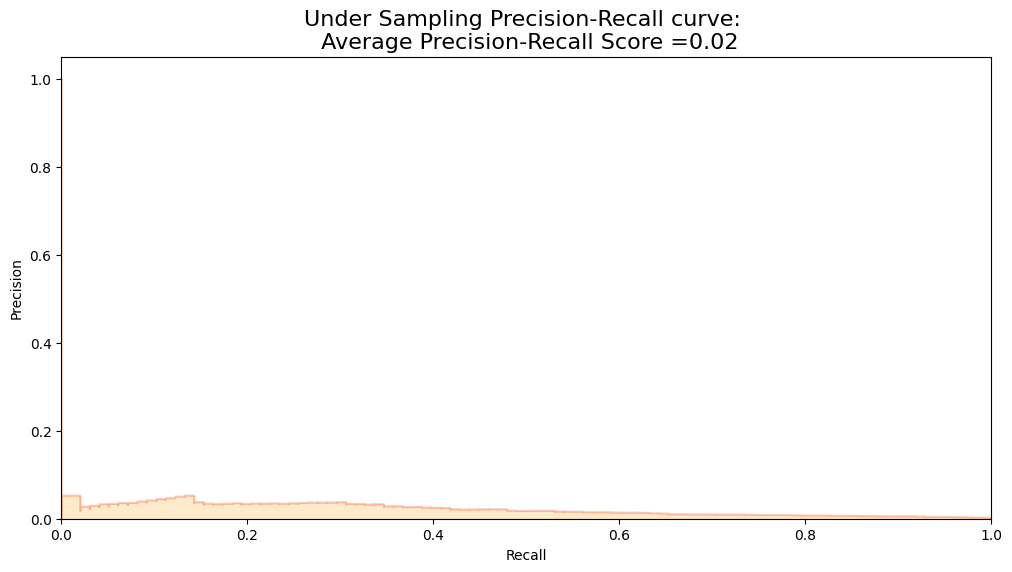

In [92]:
best= rand_log_reg1.best_estimator_
y_score = best.decision_function(X_org_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_org_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_org_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Under Sampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [93]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE


print('Length of X (train): {} | Length of y (train): {}'.format(len(X_org_train), len(y_org_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_org_test), len(y_org_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(X_org_train, y_org_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_org_train.iloc[train], y_org_train.iloc[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_org_train.iloc[test])

    accuracy_lst.append(pipeline.score(X_org_train.iloc[test], y_org_train.iloc[test]))
    precision_lst.append(precision_score(y_org_train.iloc[test], prediction))
    recall_lst.append(recall_score(y_org_train.iloc[test], prediction))
    f1_lst.append(f1_score(y_org_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(y_org_train.iloc[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9749742149268142
precision: 0.05965394421616708
recall: 0.9086335605322947
f1: 0.11191459020106094
---------------------------------------------------------------------------------------------------------------------------------------


In [94]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_org_test)
print(classification_report(y_org_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56864
       Fraud       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

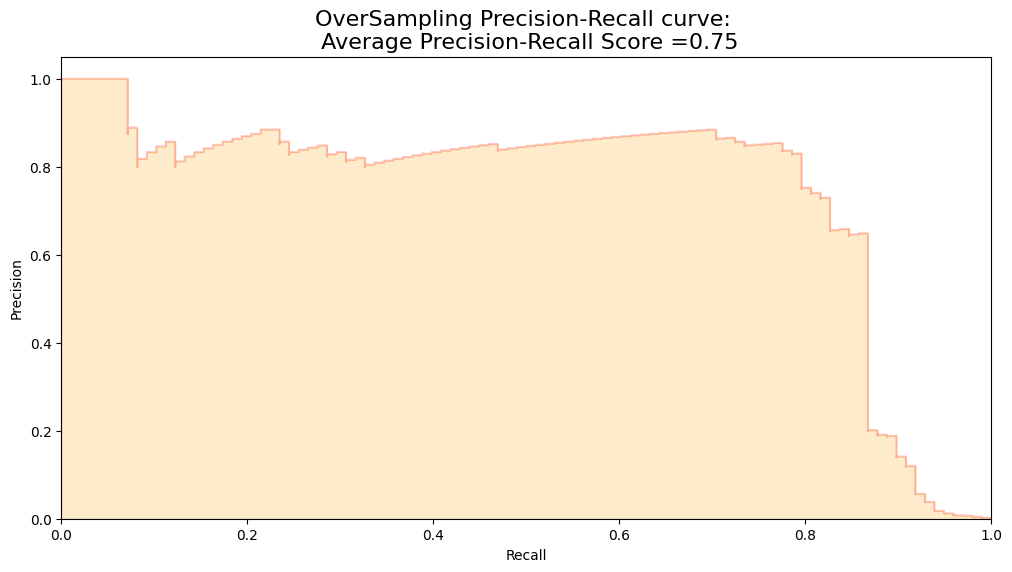

In [96]:
y_score = best_est.decision_function(X_org_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_org_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_org_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [98]:
classifier= Sequential()
classifier.add(Dense(15, activation='relu',kernel_initializer='uniform',input_shape=(30,)))
classifier.add(Dense(15, activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform' ))

In [99]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [103]:
X = df.drop('Class', axis=1)
y = df['Class']

X_nearmiss, y_nearmiss = NearMiss().fit_resample(X, y)

classifier.fit(X_nearmiss,y_nearmiss, batch_size=10,epochs=100)

Epoch 1/100
99/99 [==============================] - 5s 8ms/step - loss: 0.5755 - accuracy: 0.7978
Epoch 2/100
99/99 [==============================] - 1s 10ms/step - loss: 0.3068 - accuracy: 0.9228
Epoch 3/100
99/99 [==============================] - 1s 10ms/step - loss: 0.2201 - accuracy: 0.9360
Epoch 4/100
99/99 [==============================] - 1s 5ms/step - loss: 0.1838 - accuracy: 0.9441
Epoch 5/100
99/99 [==============================] - 1s 7ms/step - loss: 0.1656 - accuracy: 0.9492
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9543
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9543
Epoch 8/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9563
Epoch 9/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9583
Epoch 10/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9593
Epoch 1

In [122]:
undersample_pred = classifier.predict(undersample_Xtest, batch_size=200, verbose=0)

In [125]:
from sklearn.metrics import confusion_matrix
original_pred = classifier.predict(X_org_test, batch_size=200, verbose=0)
# Convert predicted probabilities to binary predictions (0 or 1)
original_pred = (original_pred > 0.5).astype(int)  # Assuming a threshold of 0.5
cm = confusion_matrix(y_org_test, original_pred)
cm


array([[56822,    42],
       [    0,    98]])

In [126]:
precision, recall, threshold = precision_recall_curve(yorgtest, oversample_pred)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_score(y_org_test, org_pred)), fontsize=16)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.70      1.00      0.82        98

    accuracy                           1.00     56962
   macro avg       0.85      1.00      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.00')

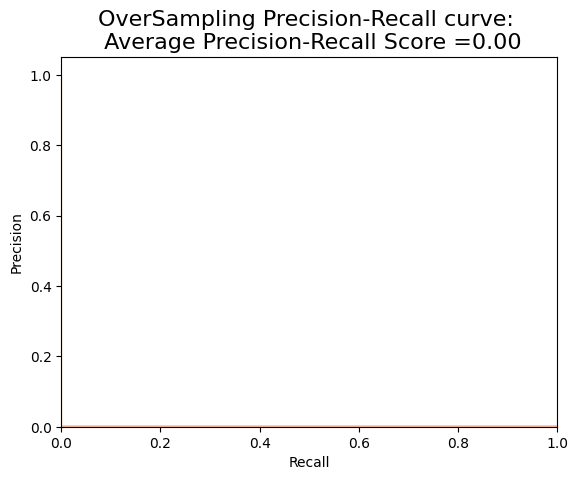

In [111]:
precision, recall, threshold = precision_recall_curve(y_org_test, undersample_pred)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_score(y_org_test, undersample_pred)), fontsize=16)

In [115]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(X, y)

classifier.fit(Xsm_train,ysm_train, batch_size=200,epochs=100)

Epoch 1/100
2844/2844 [==============================] - 24s 8ms/step - loss: 0.1271 - accuracy: 0.9513
Epoch 2/100
2844/2844 [==============================] - 13s 4ms/step - loss: 0.0440 - accuracy: 0.9841
Epoch 3/100
2844/2844 [==============================] - 8s 3ms/step - loss: 0.0250 - accuracy: 0.9930
Epoch 4/100
2844/2844 [==============================] - 10s 3ms/step - loss: 0.0177 - accuracy: 0.9954
Epoch 5/100
2844/2844 [==============================] - 13s 5ms/step - loss: 0.0140 - accuracy: 0.9966
Epoch 6/100
2844/2844 [==============================] - 10s 4ms/step - loss: 0.0119 - accuracy: 0.9971
Epoch 7/100
2844/2844 [==============================] - 11s 4ms/step - loss: 0.0106 - accuracy: 0.9974
Epoch 8/100
2844/2844 [==============================] - 22s 8ms/step - loss: 0.0095 - accuracy: 0.9977
Epoch 9/100
2844/2844 [==============================] - 18s 6ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 10/100
2844/2844 [==============================] - 26s 9ms

In [128]:
# Convert oversample_pred to binary predictions (0 or 1) based on a threshold
oversample_pred_binary = (oversample_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Now calculate the confusion matrix
confusion_matrix(y_org_test, oversample_pred_binary)

array([[56822,    42],
       [    0,    98]])

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.97')

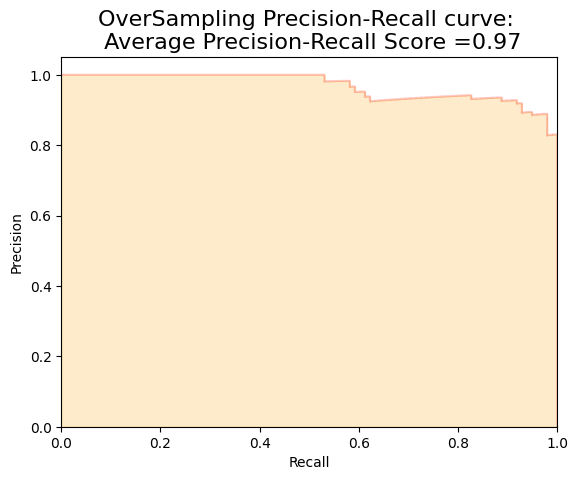

In [129]:
precision, recall, threshold = precision_recall_curve(y_org_test, oversample_pred)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_score(y_org_test, oversample_pred)), fontsize=16)

In [132]:
print(classification_report(y_org_test, oversample_pred_binary, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.70      1.00      0.82        98

    accuracy                           1.00     56962
   macro avg       0.85      1.00      0.91     56962
weighted avg       1.00      1.00      1.00     56962

